# Определение перспективного тарифа для телеком-компании

**Цель исследования** — определить наиболее перспективный тариф для компании «Мегалайн».

**Задачи исследования:**
1. Подготовить данные
2. Посчитать для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя .
3. Проанализировать данные
4. Описать поведение клиентов оператора
5. Посчитать среднее количество, дисперсию и стандартное отклонение, построить гистограммы
6. Проверить две гипотезы:
    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


**Ход исследования:**

1. Обзор данных.
2. Предобработка данных.
3. Проверка гипотез.
4. Выводы.

## Обзор данных

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st

Прочитаем ввсе файлы с данными и сохраним их в переменных.

In [2]:
try:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv', index_col=0)
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
except: 
    calls = pd.read_csv('/download/calls.csv')
    internet = pd.read_csv('/download/internet.csv', index_col=0)
    messages = pd.read_csv('/download/messages.csv')
    tariffs = pd.read_csv('/download/tariffs.csv')
    users = pd.read_csv('/download/users.csv')

Рассмотрим таблицу calls и получим общую информацию о ней

In [3]:
display(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице четыре столбца:
**id** — уникальный номер звонка
**call_date** — дата звонка
**duration** — длительность звонка в минутах
**user_id** — идентификатор пользователя, сделавшего звонок

Пропущенные значения отсутствуют.

Также в таблице заметны звонки с нулевой продолжительностью разговора, это пропущенные звонки, удалять их не нужно.

Рассмотрим таблицу internet и получим общую информацию о ней

In [5]:
display(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


В таблице четыре столбца:
**id** — уникальный номер сессии
**mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)
**session_date** — дата интернет-сессии
**user_id** — идентификатор пользователя

Пропущенные значения отсутствуют. 

Рассмотрим таблицу messages и получим общую информацию о ней.

In [7]:
display(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице три столбца:
**id** — уникальный номер сообщения
**message_date** — дата сообщения
**user_id** — идентификатор пользователя, отправившего сообщение

Пропущенные значения отсутствуют.

Рассмотрим таблицу tariffs и получим общую информацию о ней.

In [9]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В данной таблице содержится информация о тарифах.
**tariff_name** — название тарифа
**rub_monthly_fee** — ежемесячная абонентская плата в рублях
**minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату
**messages_included** — количество сообщений в месяц, включённых в абонентскую плату
**mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
**rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то **со 101 минуты будет взиматься плата)
**rub_per_message** — стоимость отправки сообщения сверх тарифного пакета
**rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

В таблице только две строки (по числу исследуемых тарифов), пропусков нет.

Рассмотрим таблицу users и получим общую информацию о ней.

In [11]:
display(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [12]:
users.query('churn_date.isna()')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица содержит данные о пользователях, в ней восемь столбцов.
**user_id** — уникальный идентификатор пользователя
**first_name** — имя пользователя
**last_name** — фамилия пользователя
**age** — возраст пользователя (годы)
**reg_date** — дата подключения тарифа (день, месяц, год)
**churn_date** — дата прекращения пользования тарифом
**city** — город проживания пользователя
**tariff** — название тарифного плана

В столбце churn_date заметны пропуски, значит, тариф ещё действовал на момент выгрузки данных.

Создадим новую таблицу на основе users, из которой удалим столбцы, не используемые анализе.

In [14]:
users_data = users.drop(['age','churn_date','first_name','last_name','reg_date'], axis=1)

**Вывод**
Таблицы содержат разное количество данных, но пропусков в них нет. Только в столбце churn_date таблицы users заметны пропуски, они означают, что тариф ещё действовал на момент выгрузки данных. Проблем с наименованиями столбцов нет.

## Предобработка данных

В ходе этого шага мы проверим данные на дубликаты, если будет необходимость, изменим форматы, исправим ошибки, добавим необходимые для анализа столбцы.

Проверим таблицы на наличие явных дубликатов.

In [15]:
print(calls.duplicated().sum())
print(internet.duplicated().sum())
print(messages.duplicated().sum())
print(tariffs.duplicated().sum())
print(users.duplicated().sum())

0
0
0
0
0


Выявим число пользователей каждого тарифа.

In [16]:
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

Приведём даты в формат datetime.

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

С учётом того, что «Мегалайн» всегда округляет секунды до минут, необходимо скорректировать данные.

In [18]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

Добавим столбец месяца совершения операции.

In [19]:
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month

Создадим таблицу с количеством звонков и израсходованных минут каждого пользователя.

In [20]:
minutes_by_month = calls.groupby(['user_id', 'month'],as_index = False)\
                        .agg({'duration':'sum', 'id':'count'})\
                        .rename(columns={'duration':'month_calls_duration','id':'month_calls_total'})

Создадим таблицу с количеством отправленных смс каждого пользователя.

In [21]:
messages_by_month = messages.groupby(['user_id', 'month'],as_index = False)\
                            .agg({'id':'count'})\
                            .rename(columns={'id':'month_sms_total'})

Создадим таблицу с количеством использованного интернет-трафика каждым пользователем.

In [22]:
internet_by_month = internet.groupby(['user_id', 'month'],as_index = False)\
                            .agg({'mb_used':'sum'})\
                            .rename(columns={'mb_used':'month_mb_total'})

В таблицах есть отсутствующие значения - в эти месяцы пользователи не являлись клиентами «Мегалайн».

In [23]:
internet_by_month.head()

,user_id,month,month_mb_total
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


In [24]:
total_data = minutes_by_month.merge(messages_by_month, on=['user_id','month'], how='outer')\
                  .merge(internet_by_month, on=['user_id','month'], how = 'outer')

In [25]:
display(total_data)

,user_id,month,month_calls_duration,month_calls_total,month_sms_total,month_mb_total
0,1000,5,159.0,22.0,22.0,2253.49
1,1000,6,172.0,43.0,60.0,23233.77
2,1000,7,340.0,47.0,75.0,14003.64
3,1000,8,408.0,52.0,81.0,14055.93
4,1000,9,466.0,58.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30
3210,1489,10,NaN,NaN,21.0,19559.44
3211,1489,11,NaN,NaN,20.0,17491.56
3212,1489,12,NaN,NaN,35.0,17322.51


Добавим новый столбец, в котором переведём мегабайты в гигабайты. Сразу округлим данные в столбце в большую сторону и приведём их к целочисленному типу.

In [26]:
total_data['month_gb_total'] = (total_data['month_mb_total'] / 1024)

In [27]:
total_data['month_gb_total'] = np.ceil(total_data['month_gb_total'])

In [28]:
# check
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3214 non-null   int64  
 1   month                 3214 non-null   int64  
 2   month_calls_duration  3174 non-null   float64
 3   month_calls_total     3174 non-null   float64
 4   month_sms_total       2717 non-null   float64
 5   month_mb_total        3203 non-null   float64
 6   month_gb_total        3203 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 200.9 KB


In [29]:
total_data['month_gb_total'] = total_data['month_gb_total'].astype('Int64')

Подсчитаем выручку с каждого пользователя по месяцам. Для этого объединим total_data и users_data, напишем собственную функцию и добавим в таблицу столбец с итоговой оплатой в месяц.

In [30]:
total_data = total_data.merge(users_data, on='user_id', how='outer')

В таблице есть пропущенные значения, в эти месяцы пользователь не являлся клиентом компании, заполним пропуски 0.

In [31]:
features = ['month_calls_duration', 'month_calls_total', 'month_sms_total', 'month_mb_total', 'month_gb_total']

for n in features:
    total_data[n] = total_data[n].fillna(0).astype('int')

In [32]:
def month_transaction(row):
    
    if row['tariff'] == 'smart': 
        calls_extra = ( 
                        max(row['month_calls_duration'] - tariffs.loc[0, 'minutes_included'], 0) 
                        * tariffs.loc[0, 'rub_per_minute']
                       )
        messages_extra = ( 
                        max(row['month_sms_total'] - tariffs.loc[0, 'messages_included'], 0) 
                        * tariffs.loc[0, 'rub_per_message']
                       )
        gb_extra = ( 
                        np.ceil(max(row['month_mb_total'] - tariffs.loc[0, 'mb_per_month_included'], 0)/1024) 
                        * tariffs.loc[0, 'rub_per_gb']
                       )
        return calls_extra + messages_extra + gb_extra + tariffs.loc[0, 'rub_monthly_fee']
    
    else:
        calls_extra = ( 
                        max(row['month_calls_duration'] - tariffs.loc[1, 'minutes_included'], 0) 
                        * tariffs.loc[1, 'rub_per_minute']
                       )
        messages_extra = ( 
                        max(row['month_sms_total'] - tariffs.loc[1, 'messages_included'], 0) 
                        * tariffs.loc[1, 'rub_per_message']
                       )
        gb_extra = ( 
                        np.ceil(max(row['month_mb_total'] - tariffs.loc[1, 'mb_per_month_included'], 0)/1024) 
                        * tariffs.loc[1, 'rub_per_gb']
                       )
        return calls_extra + messages_extra + gb_extra + tariffs.loc[1, 'rub_monthly_fee']

total_data['total_cost'] = total_data.apply(month_transaction, axis=1)


In [33]:
# check
total_data['revenue'].sum()

4916951.0

In [34]:
# check
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               3216 non-null   int64  
 1   month                 3214 non-null   float64
 2   month_calls_duration  3216 non-null   int64  
 3   month_calls_total     3216 non-null   int64  
 4   month_sms_total       3216 non-null   int64  
 5   month_mb_total        3216 non-null   int64  
 6   month_gb_total        3216 non-null   int64  
 7   city                  3216 non-null   object 
 8   tariff                3216 non-null   object 
 9   revenue               3216 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 276.4+ KB


In [37]:
display(total_data)

,user_id,month,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,month_gb_total,city,tariff,revenue,minutes_cost
0,1000,5.0,159,22,22,2253,3,Краснодар,ultra,1950.0,0
1,1000,6.0,172,43,60,23233,23,Краснодар,ultra,1950.0,0
2,1000,7.0,340,47,75,14003,14,Краснодар,ultra,1950.0,0
3,1000,8.0,408,52,81,14055,14,Краснодар,ultra,1950.0,0
4,1000,9.0,466,58,57,14568,15,Краснодар,ultra,1950.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,0,0,21,19559,20,Санкт-Петербург,smart,1550.0,0
3212,1489,11.0,0,0,20,17491,18,Санкт-Петербург,smart,1150.0,0
3213,1489,12.0,0,0,35,17322,17,Санкт-Петербург,smart,950.0,0
3214,1128,NaN,0,0,0,0,0,Волжский,ultra,1950.0,0


**Вывод:**
В ходе предобработки данных мы изменили тип данных в столбцах с датой, округлили данные в соответствии с политикой компании, объединили таблицы, добавили столбцы с расчётами.

In [38]:
# перенесла расчет выручки после блока заполнения пропусков, так надежнее

total_data['total_cost'] = total_data.apply(month_transaction, axis=1) 

In [39]:
# check
total_data['total_cost'].sum()

278217

In [40]:
# check
total_data[total_data ['month_calls_duration'] > 500][['user_id', 'month', 'month_calls_duration', 'month_calls_total',
       'month_sms_total', 'month_gb_total', 'city', 'tariff', 'total_cost']].tail(4)

,user_id,month,month_calls_duration,month_calls_total,month_sms_total,month_gb_total,city,tariff,total_cost
3163,1496,11.0,662,80,46,25,Вологда,smart,486
3164,1496,12.0,518,80,51,21,Вологда,smart,54
3167,1497,12.0,545,71,17,20,Челябинск,smart,135
3174,1499,11.0,612,74,59,18,Пермь,smart,336


## Анализ данных

В ходе анализа данных нам необходимо описать поведение клиентов оператора, исходя из выборки - сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, посчитать среднее количество, дисперсию и стандартное отклонение, построить гистограммы, описать распределения.

Чтобы расчитать объём необходимого трафика, сообщений и звонков пользователям каждого тарифа в месяц, разделим таблицу total_data по тарифам.

In [41]:
smart = total_data[total_data['tariff'] == 'smart']
ultra = total_data[total_data['tariff'] == 'ultra']

In [42]:
display(smart)
display(ultra)

,user_id,month,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,month_gb_total,city,tariff,revenue,minutes_cost,total_cost
8,1001,11.0,430,59,0,18429,18,Москва,smart,1150.0,0,0
9,1001,12.0,414,63,0,14036,14,Москва,smart,550.0,0,0
10,1002,6.0,117,15,4,10856,11,Стерлитамак,smart,550.0,0,0
11,1002,7.0,214,26,11,17580,18,Стерлитамак,smart,1150.0,0,0
12,1002,8.0,289,42,13,20319,20,Стерлитамак,smart,1550.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3210,1489,9.0,0,0,32,17206,17,Санкт-Петербург,smart,950.0,0,0
3211,1489,10.0,0,0,21,19559,20,Санкт-Петербург,smart,1550.0,0,0
3212,1489,11.0,0,0,20,17491,18,Санкт-Петербург,smart,1150.0,0,0
3213,1489,12.0,0,0,35,17322,17,Санкт-Петербург,smart,950.0,0,0


,user_id,month,month_calls_duration,month_calls_total,month_sms_total,month_mb_total,month_gb_total,city,tariff,revenue,minutes_cost,total_cost
0,1000,5.0,159,22,22,2253,3,Краснодар,ultra,1950.0,0,0
1,1000,6.0,172,43,60,23233,23,Краснодар,ultra,1950.0,0,0
2,1000,7.0,340,47,75,14003,14,Краснодар,ultra,1950.0,0,0
3,1000,8.0,408,52,81,14055,14,Краснодар,ultra,1950.0,0,0
4,1000,9.0,466,58,57,14568,15,Краснодар,ultra,1950.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3205,1473,9.0,0,0,19,17289,17,Красноярск,ultra,1950.0,0,0
3206,1473,10.0,0,0,20,13688,14,Красноярск,ultra,1950.0,0,0
3207,1473,11.0,0,0,14,21673,22,Красноярск,ultra,1950.0,0,0
3208,1473,12.0,0,0,20,18418,18,Красноярск,ultra,1950.0,0,0


Теперь постороим графики для всех параметров, для этого напишем функцию. Для наглядности совместим показатели тарифрв "Смарт" и "Ультра" на одной гистограмме.

'month_calls_duration'

,mean,median,std,var
tariff,,,,
smart,417.7,421.5,190.5,"36,281.4"
ultra,526.1,518.0,317.9,"101,052.5"


                       mean                  var                  std
       month_calls_duration month_calls_duration month_calls_duration
tariff                                                               
smart                 417.7             36,281.4                190.5
ultra                 526.1            101,052.5                317.9


'month_sms_total'

,mean,median,std,var
tariff,,,,
smart,33.4,28,28.2,797.0
ultra,49.3,38,47.8,"2,285.4"


                  mean             var             std
       month_sms_total month_sms_total month_sms_total
tariff                                                
smart             33.4           797.0            28.2
ultra             49.3         2,285.4            47.8


'month_gb_total'

,mean,median,std,var
tariff,,,,
smart,16.3,17,5.8,33.1
ultra,19.5,19,9.9,97.4


                 mean            var            std
       month_gb_total month_gb_total month_gb_total
tariff                                             
smart            16.3           33.1            5.8
ultra            19.5           97.4            9.9


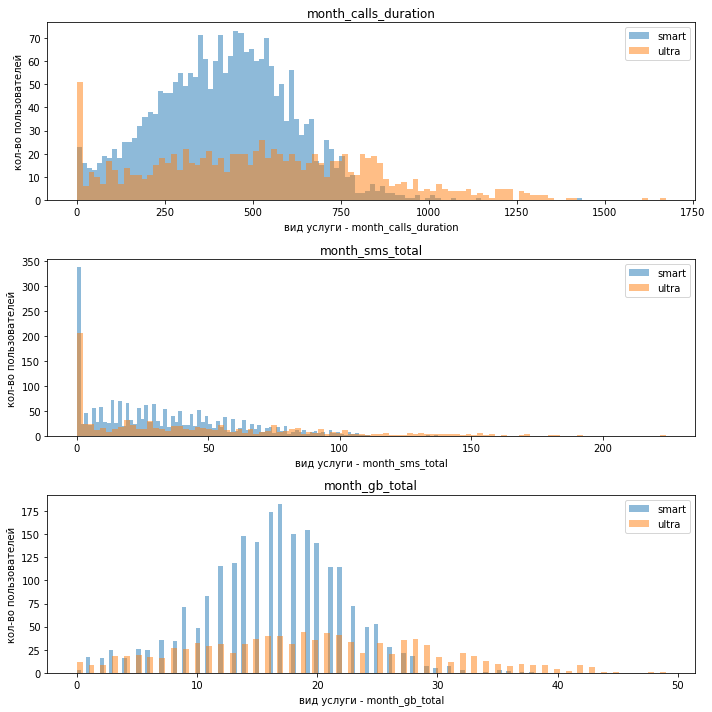

In [43]:
pd.options.display.float_format = '{:,.1f}'.format

axes = ['month_calls_duration', 'month_sms_total', 'month_gb_total']
fig = plt.figure(figsize=(10, 10))
total_axes = 3
subplt = 1

for context in axes:  
    ax = fig.add_subplot(total_axes, 1, subplt)
    total_data.groupby('tariff')[context].plot.hist(bins = 100, alpha = 0.5, legend = True)
    display (context, total_data.groupby('tariff')[context].agg(['mean', 'median', 'std','var']).round(1))
    
    plt.ylabel(f'кол-во пользователей')
    plt.xlabel(f'вид услуги - {context}')
    plt.title(context)
   
    subplt+=1
  
    plt.tight_layout();
    print(total_data.pivot_table(index = 'tariff',values=context,aggfunc = ['mean','var','std']))

'month_calls_duration'

,mean,median,std,var
tariff,,,,
smart,417.7,421.5,190.5,"36,281.4"
ultra,526.1,518.0,317.9,"101,052.5"


'month_sms_total'

,mean,median,std,var
tariff,,,,
smart,33.4,28,28.2,797.0
ultra,49.3,38,47.8,"2,285.4"


'month_gb_total'

,mean,median,std,var
tariff,,,,
smart,16.3,17,5.8,33.1
ultra,19.5,19,9.9,97.4


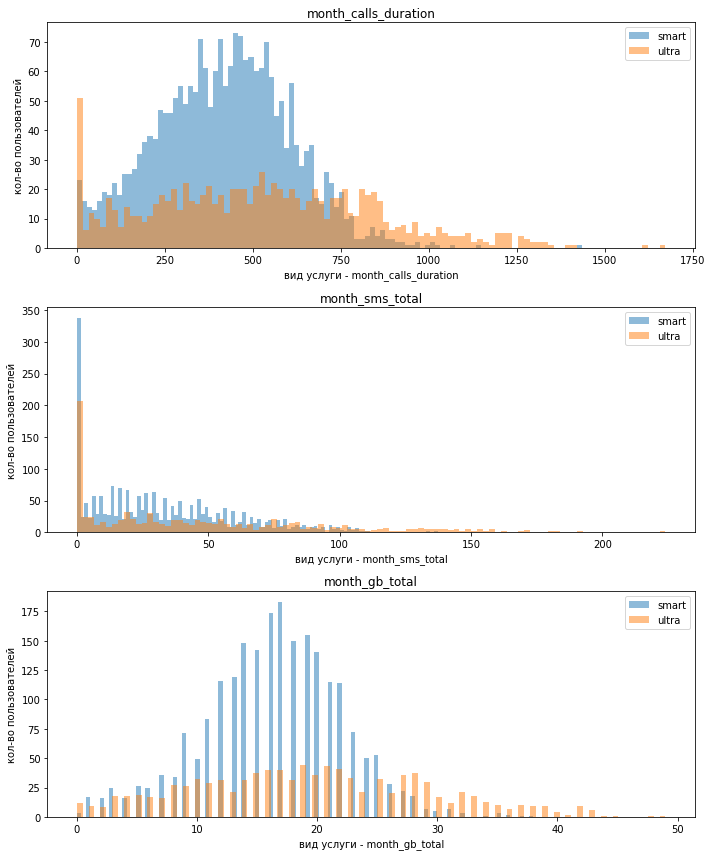

In [44]:
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.1f}'.format
list_col = ['month_calls_duration', 'month_sms_total', 'month_gb_total']

fig = plt.figure(figsize=(10, 12))
total_axes = 3 # общее количество графиков (в данном случае
                             # берем равным количеству колонок в датафрейме
subplt = 1 # номер начального axes

for i in list_col:
      
    ax = fig.add_subplot(total_axes, 1, subplt) # добавляем axes для каждого графика
    total_data.groupby('tariff')[i].plot.hist(bins = 100, alpha = 0.5, legend = True)
    display (i, total_data.groupby('tariff')[i].agg(['mean', 'median', 'std','var']).round(1))
    
    plt.ylabel(f'кол-во пользователей')
    plt.xlabel(f'вид услуги - {i}')
    plt.title(i)
   
    subplt+=1
  
plt.tight_layout();
# plt.show()

**График используемых минут для звонков** - нормальное распределение для тарифа "Смарт" и скошенное влево для тарифа "Ультра"

**График используемых сообщений** - распределение Пуассона, скошено вправо

**График используемых гигагабайт** - нормальное распределение

**ТАРИФ "SMART":**
Средний объём звонков - 417,9 минут (округлим до 418 минут)
Стандартное отклонение для звонков - 190,3 минут
Дисперсия звонков - 36219.3

Средний объём смс-сообщений - 33,4 сообщения (округлим до 34 сообщений)
Стандартное отклонение для смс-сообщений - 28,2 сообщений
Дисперсия для смс-сообщений - 796,8 

Средний объём используемого интернет-трафика - 16,3 гб (округлим до 17 гб)
Стандартное отклонение используемого интернет-трафика - 5,7 гб
Дисперсия используемого интернет-трафика - 33

**ТАРИФ "ULTRA":**
Средний объём звонков - 526,6 минут (округлим до 527 минут)
Стандартное отклонение для звонков - 317,6 минут
Дисперсия звонков - 100873.6

Средний объём смс-сообщений - 49,4 сообщения (округлим до 50 сообщений)
Стандартное отклонение для смс-сообщений - 47,8 сообщений
Дисперсия для смс-сообщений - 2285,3

Средний объём используемого интернет-трафика - 19,5 гб (округлим до 20 гб)
Стандартное отклонение используемого интернет-трафика - 8,5 гб
Дисперсия используемого интернет-трафика - 97

На графиках заметно, что пользователи обоих тарифов превышают установленные объёмы в части использования интернет-трафика. Также мы видим, что сообщения мало используют пользователи обоих тарифов.

Для того, чтобы выяснить насколько часто пользователи выходят за рамки тарифа, построим диаграммы размаха.

<AxesSubplot:>

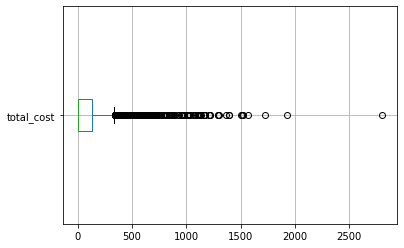

In [45]:
smart[['total_cost']].boxplot(vert=False)

<AxesSubplot:>

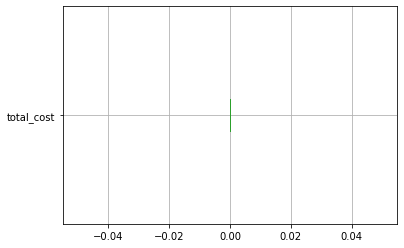

In [46]:
ultra[['total_cost']].boxplot(vert=False)

На графиках хорошо заметно, что пользователи тарифа "Смарт" часто первышают лимиты своего тарифа, в отличии от клиентов, использующих тариф "Ультра".

Теперь расчитаем годовую выручку по каждому тарифу и выделим наиболее перспективный.

In [47]:
total_data.pivot_table(index='tariff', values=['total_cost'], aggfunc = 'sum')

,total_cost
tariff,
smart,278217
ultra,0


При сравнении дохода от использования тарифов видно, что тариф "Смарт" приносит денег больше. Важную роль в этом играет превышение пользователями установленных лимитов.

**Вывод:**
В поведении пользователей обоих тарифов есть схожесть - все используют довольно небольшой объём смс-сообщений. Также на графиках заметно, что пользователи тарифа Смарт используют минут звонков и гигабайт интернета больше, чем пользователи тарифа Ультра. Клиенты, использующие тариф "Смарт" часто выходят за лимиты тарифа, что делает его более доходным.

## Проверка гипотез

Нам необходимо проверить две гипотезы:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проверки гипотез необходимо сформулировать нулевые гипотезы. В нашем случае они будут следующими:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются;
2. средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Проверим гипотезы:
- H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются
- H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Пороговое значение alpha зададим 5%

In [48]:
alpha = 0.05

results = st.ttest_ind(
    smart['total_cost'], 
    ultra['total_cost'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.927833060182933e-52
Отвергаем нулевую гипотезу


Проверка гипотезы показала, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Проверим гипотезы:
- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [49]:
alpha = 0.05

moscow = total_data.query("city == 'Москва'")['total_cost']
other_city = total_data.query("city != 'Москва'")['total_cost']

results = st.ttest_ind(moscow, other_city)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1414107150498956
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средняя выручка пользователей из Москвы и регионов незначительно отличается, с вероятностью в почти 54% такое различие можно получить случайно. Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов, и наша гипотеза не подтвердилась.

**Вывод:**
В ходе проверки гипотез мы выяснили, что различается средняя выручка пользователей тарифов «Ультра» и «Смарт», а вот средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

## Итоги исследования

В ходе выполнения проекта мы:
- Подготовили данные для исследования
- Посчитали для каждого пользователя объёмы используемых минут разговора, смс-сообщений, гигабайт интернета, помесячную выручку с каждого пользователя
- Проанализировали данные
- Описали поведение клиентов оператора
- Посчитали среднее количество, дисперсию и стандартное отклонение, построили гистограммы
- Сделали выводы

Выяснилось, что поведении пользователей обоих тарифов есть схожесть - все используют довольно небольшой объём смс-сообщений. Также пользователи тарифа Смарт используют минут звонков и гигабайт интернета больше, чем пользователи тарифа Ультра.

В ходе проверки гипотез мы выяснили, что различается средняя выручка пользователей тарифов «Ультра» и «Смарт», а вот средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Также мы выяснили, что тариф "Смарт" приносит компании больше денег, чем тариф "Ультра". Разница доходности тарифов составляет 836251 рублей.

Возможно, следует добавить ещё один или несколько новых тарифов в соответствии с потребностями клиентов. Мы видим, что пользователям тарифа "Смарт" не хватает объёма звонков и интернет-трафика, а тариф "Ультра" может показаться для них слишком большим. Также можно добавить тариф, в котором увеличивать один параметр (минуты звонков или интернет-трафик) и люди, активно использующие этот параметр, но мало пользующиеся другими, будут выбирать этот тариф.